# Xflrutau5
Fluxo de comandos para otimizar o projeto de uma asa subsônica 

In [3]:
import Codigo_otimizador_copy as ot 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%load_ext autoreload
%autoreload
import Polar_de_arrasto as polar


env = (3.5, 4.1)
chord = (0.35, 0.45)
offset = (0.01, 0.05)

geometria = [env, chord, offset]

### Criando uma população inicial de asas

In [ ]:
asas_populacao_inicial = ot.criar_asas(geometria, limite_populacional = 5)
asas_populacao_inicial

### Analisando a população que foi criada
Foi utilizada o método 'Razão' para a estimativa de massa que consiste em estimar a massa das asas de acordo com a razão média entre a massa e área de asas passadas

In [49]:
ot.analisador(asas_populacao_inicial, metodo_massa = 'RAZAO')

### As asas criadas foram colocadas em ordem em razão de sua pontuação do maior para o maior

In [41]:
asas_populacao_inicial = sorted(asas_populacao_inicial, key = lambda x: x.pontuacao, reverse=True)

### Espaço para a verificação das asas antes de criar um DataFrame

In [84]:
#asas_populacao_inicial[0].file_and_commands(alfa_stol = 13.5)

In [90]:
#asas_populacao_inicial[0].calc_massa("RAZAO")

(14.271151885830783, 5.5472, 1.660387359836901, 3.8868126401630994)

In [86]:
#asas_populacao_inicial[0].corda

[0.4, 0.4, 0.4, 0.4]

### Criação de um DataFrame das asas que foram criadas
Obs: As asas foram analisadas antes

In [ ]:
df_asas = ot.criar_df(asas_populacao_inicial)

#### Visualização do DataFrame

In [51]:
df_asas

,AREA,ENVERGADURA,AR,AFILAMENTO,MTOW,CARGA_PAGA,MASSA_ASA,PONTUACAO,ALFA,CD,CL
0,1.472280,3.790343,9.758133,0.809995,21.916412,16.681303,3.287462,16.681303,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0035, 0.0056, 0.0082, 0.0114, 0.015, 0.0191...","[0.3175, 0.4051, 0.4927, 0.58, 0.6671, 0.7539,..."
1,1.578308,3.745694,8.889410,0.869038,21.916412,15.783167,3.287462,15.783167,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.004, 0.0062, 0.009, 0.0124, 0.0162, 0.0206,...","[0.3145, 0.4001, 0.4856, 0.571, 0.6561, 0.7409..."
2,1.366403,3.690069,9.965298,0.855100,21.304791,16.708976,3.195719,16.708976,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0037, 0.0058, 0.0084, 0.0116, 0.0152, 0.019...","[0.3189, 0.4068, 0.4946, 0.5823, 0.6697, 0.756..."
3,1.435252,3.652999,9.297604,0.817084,21.406728,16.424463,3.211009,16.424463,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0038, 0.006, 0.0087, 0.012, 0.0157, 0.02, 0...","[0.3166, 0.4034, 0.4901, 0.5765, 0.6628, 0.748..."
4,1.529754,3.878959,9.835775,0.781808,22.324159,16.634233,3.348624,16.634233,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0036, 0.0057, 0.0083, 0.0115, 0.0151, 0.019...","[0.3189, 0.4071, 0.4951, 0.583, 0.6706, 0.758,..."


### Utilizando o algoritmo genético na asas que foram criadas
**Obs**: As asas foram analisadas e colocadas em ordem antes

In [32]:
asas_finais = ot.genetico(asas_populacao_inicial)

### Espaço para a verificação das asas otimizadas antes de criar um DataFrame

In [33]:
asas_finais

In [22]:
#for asa in asas_finais:
    #asa.file_and_commands(asas_finais.index(asa), alfa_stol = 13.5)

In [25]:
#asas_finais[0].cordas

[0.157925, 0.357532, 0.386838, 0.393221]

### Criação de um DataFrame das asas que foram otimizadas

In [34]:
df_asas = ot.criar_df(asas_finais)

#### Visualização do DataFrame

In [35]:
df_asas

,AREA,ENVERGADURA,AR,AFILAMENTO,MTOW,CARGA_PAGA,PONTUACAO,ALFA,CD,CL
0,1.409195,3.861214,10.579783,0.865599,21.916412,17.093206,17.093206,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0035, 0.0056, 0.0081, 0.0111, 0.0146, 0.018...","[0.3208, 0.4098, 0.4987, 0.5874, 0.6758, 0.764..."
1,1.406075,3.861190,10.603124,1.144646,21.712538,16.907330,16.907330,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0037, 0.0058, 0.0084, 0.0114, 0.0149, 0.018...","[0.3174, 0.4047, 0.4919, 0.5789, 0.6657, 0.752..."
2,1.175616,3.767813,12.075725,0.678184,20.998981,16.905388,16.905388,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0031, 0.0049, 0.0072, 0.01, 0.0132, 0.0169,...","[0.3265, 0.4186, 0.5107, 0.6025, 0.6941, 0.785..."
3,1.390985,3.862264,10.724118,1.153440,21.610601,16.889300,16.889300,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0038, 0.0059, 0.0084, 0.0114, 0.0149, 0.018...","[0.3177, 0.4051, 0.4925, 0.5796, 0.6665, 0.753..."
4,1.399560,3.860776,10.650200,1.155129,21.610601,16.842262,16.842262,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0037, 0.0058, 0.0083, 0.0114, 0.0149, 0.018...","[0.3175, 0.405, 0.4922, 0.5794, 0.6662, 0.7528..."
5,1.642576,3.960297,9.548391,0.944809,22.629969,15.826683,15.826683,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1...","[0.0038, 0.006, 0.0087, 0.0119, 0.0156, 0.0198...","[0.3163, 0.4028, 0.4892, 0.5755, 0.6615, 0.747..."


In [ ]:
#df_asas['CD'] = df_asas['CD'].apply(lambda x: [float(s) for s in x[1:-1].split(",")])
#df_asas['CL'] = df_asas['CL'].apply(lambda x: [float(s) for s in x[1:-1].split(",")])
#df_asas['ALFA'] = df_asas['ALFA'].apply(lambda x: [float(s) for s in x[1:-1].split(",")])

### Visualização das polares de arrasto
* Recebe o DataFrame de asas que já foram analisadas
* O tipo da polar recebe qual polar queremos vizualizar de acordo com a documentação
* O index recebe a lista de indices das asas que queremos vizualizar de acordo com o DataFrame

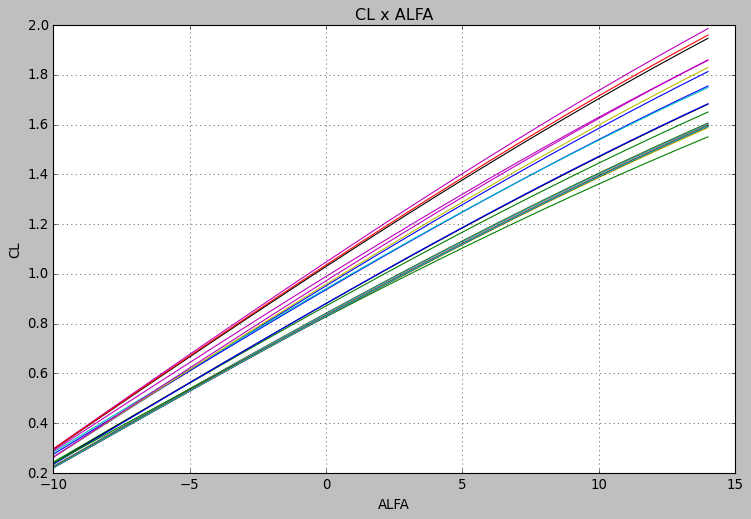

In [12]:
polar.polar(df_asas, index = list(df_asas.index), tipo = 5)

### Salva o DataFrame em formato xlsx
* Usa uma função interna do python

In [ ]:
df_asas.to_excel("testesdeplot.xlsx")